A recent issue I had in my research is tick labels that overlap each other. It happens when there are too many leading zeros before the significant digit, yet too loo little for `matplotlib` to intelligently shift to scientific notation (about 4-7 leading zeroes). That result in the tick labels overlapping and making everything unreadable. It is not that much of a problem on exploratory code, but when I need a paper-worthy chart, it's an issue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Create random data of 
x = np.random.normal(loc = 0.0000035, scale= 0.000002, size = 5000)
print (x)

[  8.31013754e-06   3.27179327e-06   4.69706334e-06 ...,   4.74069857e-06
   4.34079723e-06   3.74642695e-06]


I have 5000 samples from the normal distribution. The samples have about 6 leading zeroes. Next, I'll create a histogram for the samples.

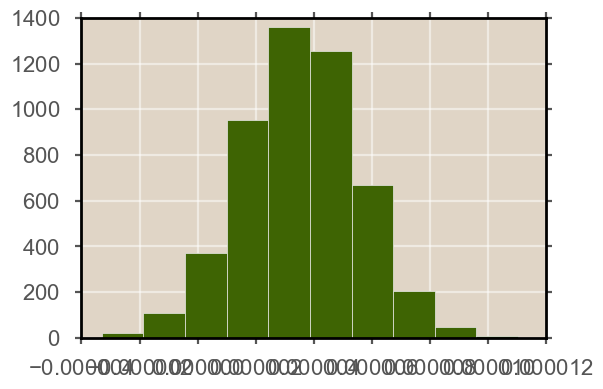

In [11]:
fig, axs = plt.subplots(figsize=(6,4))
axs.hist(x)
plt.show()

You can see how the labels of the x axis are overlapping and you can't understand any of them. I wanted a fast yet elegant way to deal with this. I didn't want to mess with `rcParams` for now (Although probably better in the long run).  
`.get_xticks()` method returns a `numpy array` of all the labels. Now with the easy slicing mechanism of `numpy arrays` I can get all even places.  
`.set_xticks()` method can set the new ticks to that value.

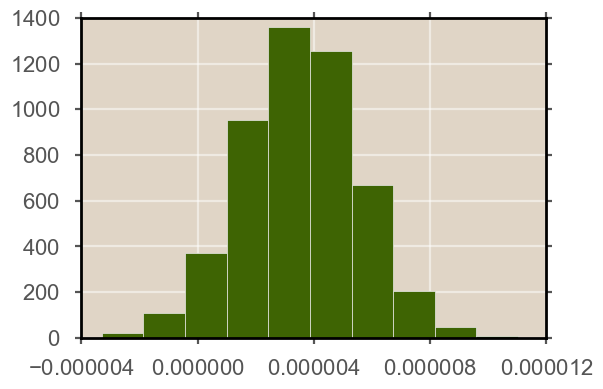

In [10]:
fig, axs = plt.subplots(figsize=(6,4))
axs.hist(x)
axs.set_xticks(axs.get_xticks()[::2])
plt.show()

I guess there are more efficient ways, if you have many ticks on a many `axes` object, but this is a nice, elegant hack if you need it for a few paper-worthy charts, without the hassle.